This is a public set of comments collected for spam research. It has five datasets composed of 1,956 real messages extracted from five videos. These five videos are popular pop songs that were among the 10 most viewed in the collection period.Use that filter to check the accuracy of the remaining dataset.

In [18]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the four training datasets
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')

# Concatenate the training datasets
training_data = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Preprocess the data
training_data['DATE'] = pd.to_datetime(training_data['DATE'])
training_data = training_data.drop(columns=['AUTHOR'])

# Clean text data and convert to numerical format (TF-IDF vectors)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train = tfidf_vectorizer.fit_transform(training_data['CONTENT'])
y_train = training_data['CLASS']

# Separate spam and non-spam comments
spam_comments = training_data[training_data['CLASS'] == 1]
non_spam_comments = training_data[training_data['CLASS'] == 0]

# Print the number of spam and non-spam comments
print("Number of spam comments of training dataset:", len(spam_comments))
print("Number of non-spam comments of training dataset:", len(non_spam_comments))

# Train the Naïve Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Load the test dataset
test_data = pd.read_csv('Youtube05-Shakira.csv')

# Preprocess the test data
test_data['DATE'] = pd.to_datetime(test_data['DATE'])
test_data = test_data.drop(columns=['AUTHOR'])

# Clean text data and convert to numerical format (TF-IDF vectors)
X_test = tfidf_vectorizer.transform(test_data['CONTENT'])

# Use the Naïve Bayes classifier to generate test_predictions
test_predictions = naive_bayes.predict(X_test)

# Separate spam and non-spam comments in test_predictions
spam_comments = np.count_nonzero(test_predictions == 0)
non_spam_comments = np.count_nonzero(test_predictions == 1)

# Print the number of spam and non-spam comments in test_predictions
print("\nNumber of spam comments in test predictions:", spam_comments)
print("Number of non-spam comments in test predictions:", non_spam_comments)

# Get the number of features after TF-IDF vectorization
num_features = len(tfidf_vectorizer.vocabulary_)

# Print the number of features
print("\nNumber of features in the training data:", num_features)

# Get the number of features in the test data
num_features_test = X_test.shape[1]

print("\nNumber of features in the test data:", num_features_test)

Number of spam comments of training dataset: 831
Number of non-spam comments of training dataset: 755

Number of spam comments in test predictions: 179
Number of non-spam comments in test predictions: 191

Number of features in the training data: 3699

Number of features in the test data: 3699


In [16]:
# Evaluate the model
accuracy = accuracy_score(test_data['CLASS'], test_predictions)
precision = precision_score(test_data['CLASS'], test_predictions)
conf_matrix = confusion_matrix(test_data['CLASS'], test_predictions)

print("Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8729729729729729

Precision: 0.8324607329842932

Confusion Matrix:
[[164  32]
 [ 15 159]]


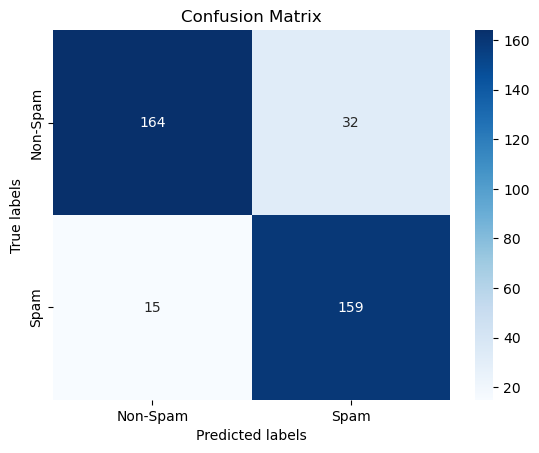

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Non-Spam', 'Spam'], 
            yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Results & Analysis

Preprocessing and Feature Engineering:
- Converted text data to TF-IDF vectors using sklearn.feature_extraction.text.TfidfVectorizer
- Dropped the 'AUTHOR' column as it was not used in the model training
- Converted the 'DATE' column to datetime format

Train-Test Split:
- Used first 4 datasets for training and the fifth as the test dataset

Model Training:
- Used sklearn.naive_bayes.MultinomialNB as the Naive Bayes classifier
- Fit the model on the training data (X_train, y_train)

Model Information:
Naïve Bayes algorithm used: MultinomialNB
TF-IDF vectorization used for feature extraction
  
Model Training Details:
Dataset Information:
Number of training samples: 1956
Number of features (after TF-IDF vectorization): [3699]
Class distribution:
    - Spam comments: [831]
    - Non-spam comments: [755]
    
Model test data Details:
Dataset Information:
Number of test samples: 370
Number of features (after TF-IDF vectorization): [3699]
Class distribution after prediction:
    - Spam comments: [179]
    - Non-spam comments: [191]
    
Model Evaluation:
- Used the trained model to make predictions on the test data (X_test)
- Calculated the accuracy, precision and confusion matrix of the model on the test data using sklearn.metrics.accuracy_score
- Test Accuracy: 0.8729729729729729 (approximately 87.3%)
- Test Precision:
- Confusion Matrix:

With a test accuracy of 0.873, the spam filter was able to identify about 87.3% of the comments were properly identified as spam or non-spam, indicating that the model has taken the relevant patterns from the training set and is capable of making good generalizations to new data.

The precision score of approximately 0.832 indicates that around 83.2% of the comments predicted as spam by the classifier were actually spam, while the remaining 16.8% were false positives.

Now, let's interpret the confusion matrix: classifier cor

True Positives (TP): The classifier correctly predicted 164 comments as spam.
False Positives (FP): The classifier incorrectly predicted 32 non-spam comments as spam.
True Negatives (TN): The classifier correctly predicted 159 comments as non-spam.
False Negatives (FN): The classifier incorrectly predicted 15 spam comments as non-spam.